In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import warnings
import sys
path_utils = 'C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/tweet_utils'
sys.path.append(path_utils)
import utils
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Tweets/"

In [3]:
tweets = pd.read_csv(path + "tweets_without_useless_and_score (5.0).csv",
                         lineterminator="\n", low_memory=False, encoding="utf-8")


ParserError: Error tokenizing data. C error: out of memory

In [ ]:
tweets = tweets[~tweets["urls"].str.contains("twitter.com")]
tweets

In [ ]:
dates = []
for i in tqdm(tweets["created_at"]):
    dates.append(utils.process_datetime(i))

In [ ]:
tweets["dates"] = dates
tweets['date_tweets']= tweets.groupby(['dates'])['created_at'].transform('size')
tweets_for_plot = tweets.drop_duplicates(subset='dates')

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Tweets (with URLs) over time ', fontsize=18)
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

plt.plot(tweets_for_plot['dates'], tweets_for_plot['date_tweets'], c='b', label='Tweets')
# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

#### Mesi sul totale

In [ ]:
low = tweets[tweets["LOW"]>0]
low['date_tweets']= low.groupby(['dates'])['created_at'].transform('size')
low_for_plot = low.drop_duplicates(subset='dates')

In [ ]:
print(round(low["SOCIAL"].sum()/low["number_of_urls"].sum()*100,2),"% social")
print(round(low["UNKW"].sum()/low["number_of_urls"].sum()*100,2),"% unknown")
print(round(low["HIGH"].sum()/low["number_of_urls"].sum()*100,2),"% high")
print(round(low["LOW"].sum()/low["number_of_urls"].sum()*100,2),"% low")

In [ ]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Low cred over time ', fontsize=18)
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
low_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

# plt.plot(sorted(low['dates']), low['date_tweets'], c='b', label='Low')
plt.plot(tweets_for_plot['dates'], tweets_for_plot['date_tweets'], c='magenta', label='Tweets')
plt.plot(low_for_plot['dates'], low_for_plot['date_tweets'], c='green', label='Low cred')

# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [ ]:
good = []
bad = []
number = []
date = []
for i in tqdm(tweets["dates"].unique()):
    general = tweets[tweets["dates"]==i]
    date.append(i)
    good.append(round(general["HIGH"].sum()/general["number_of_urls"].sum()*100,2))
    bad.append(round(general["LOW"].sum()/general["number_of_urls"].sum()*100,2))
    number.append(len(general))


In [ ]:
df = pd.DataFrame(list(zip(number,date,bad,good)), columns=["number", "date", "low", "high"])
df.sort_values(by=["date"], ascending=True, inplace=True)

In [4]:
df

NameError: name 'df' is not defined

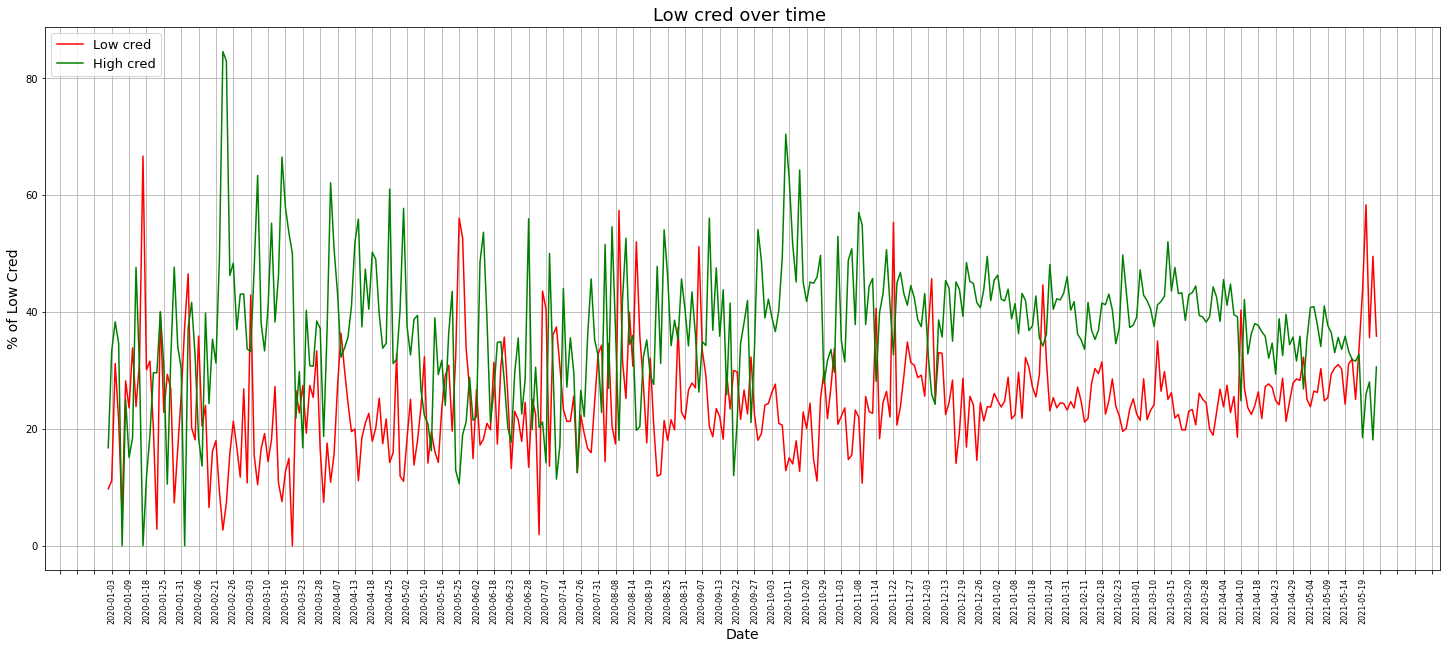

In [28]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Low and Hight credibility domains shared over time ', fontsize=18)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('% of Low Cred', fontsize=14)

# plt.plot(sorted(low['dates']), low['date_tweets'], c='b', label='Low')
plt.plot(df['date'], df['low'], c='red', label='Low cred')
plt.plot(df['date'], df['high'], c='green', label='High cred')


# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [29]:
df.sort_values(by=["low"], ascending=False)

,number,date,low,high
13,3,2020-01-16,66.67,0.00
348,105,2021-05-20,58.33,25.93
226,932,2020-08-09,57.37,18.03
153,130,2020-05-25,56.06,10.61
67,148,2020-11-22,55.33,32.67
...,...,...,...,...
7,19,2020-01-06,5.00,0.00
18,70,2020-01-21,2.82,29.58
105,145,2020-02-23,2.68,84.56
202,158,2020-07-05,1.90,20.25


In [21]:
# pd.Series(tweets[(tweets["dates"]=="2020-12-04")]["domain"]).value_counts().sort_values(ascending=False)

In [20]:
# pd.Series(tweets[(tweets["dates"]=="2020-12-04")]["text"]).value_counts().sort_values(ascending=False)

# Hashtag - Media low cred

In [30]:
df_low = tweets[tweets["LOW"]/tweets["number_of_urls"]==1]

In [31]:
valore = pd.Series(df_low[df_low["hashtags"]!="[]"]["hashtags"]).value_counts().sort_values(ascending=False)

In [32]:
hashtag = list(valore.index)

In [33]:
lst = []
for valore in tqdm(hashtag):
    for i in valore.split("'text'")[1:]:
        lst.append(i.split(",")[0][3:-1])

In [35]:
pd.Series(lst).value_counts().sort_values(ascending=False)

vaccino       2799
Covid         1626
Vaccino       1374
vaccini       1286
Vaccini       1024
              ... 
TeamVox          1
Parco            1
Solomeo          1
monitorare       1
lisola           1
Length: 8855, dtype: int64

# Bad text - hashtags

In [57]:
rt_nt = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/Vaccines_Discussion_Italy/Laura/Files/gephi/names_louvain.csv")
for i in rt_nt.itertuples():
    if "Agenzia" in i.Label:
        print(i.Label)
        print(i.Community)

Agenzia_Dire
3
AgenziaVISTA
3
AgenziaH
0
Agenzia_Ansa
3
Agenzia_Italia
3


In [62]:
merge = tweets.merge(rt_nt, left_on="user_screen_name", right_on="Label", how="left")
bad = merge[merge["Community"]==4]
good = merge[merge["Community"]==0]
giornali = merge[merge["Community"]==3]

In [63]:
bad

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,number_of_urls,LOW,HIGH,UNKW,SOCIAL,dates,date_tweets,Id,Label,Community
4,1221724185380171776,1221724185380171776,Mon Jan 27 09:18:38 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Vaccini: I Genitori Vengono Manipolati? https:...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
5,1221718576505245696,1221718576505245696,Mon Jan 27 08:56:21 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,LA Russia Sostituisce i Vaccini Stanieri con Q...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
7,1221717982189170689,1221717982189170689,Mon Jan 27 08:54:00 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Scioccante Scoperta alla Harvard Medical Schoo...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
8,1221718024895582208,1221718024895582208,Mon Jan 27 08:54:10 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,Detriti di Metalli Trovati Nella Fornitura di ...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
9,1221718549292560384,1221718549292560384,Mon Jan 27 08:56:15 +0000 2020,906232083324043269,Toba_60,False,Fri Sep 08 19:05:40 +0000 2017,I Medici che Hanno Scoperto gli Enzimi del Can...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",NaN,...,1,1,0,0,0,2020-01-27,132,12336.0,Toba_60,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634388,1394609151230324741,1394609151230324741,Tue May 18 11:01:46 +0000 2021,139715784,alportog,False,Mon May 03 13:17:22 +0000 2010,https://t.co/KwtLsMfWbf: COVID: MUORE dopo la ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1,1,0,0,0,2021-05-18,4539,6904.0,alportog,4.0
634389,1394609774239571973,1394609774239571973,Tue May 18 11:04:15 +0000 2021,359462299,GiadaFlamini,False,Sun Aug 21 16:45:38 +0000 2011,https://t.co/WX3hQR4o5g,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1,0,0,1,0,2021-05-18,4539,2290.0,GiadaFlamini,4.0
634392,1394609980268072964,1394609980268072964,Tue May 18 11:05:04 +0000 2021,1322010178078859264,marchesaangeli,False,Fri Oct 30 02:59:31 +0000 2020,Anno 2018 - Intervista a Burioni sui vaccini c...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,1,1,0,0,0,2021-05-18,4539,18228.0,marchesaangeli,4.0
634393,1394609978980319232,1394609978980319232,Tue May 18 11:05:04 +0000 2021,2197175103,grecale66,False,Tue Nov 26 18:05:12 +0000 2013,"Vaccino Covid, nuovo errore di somministrazion...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,1,1,0,0,0,2021-05-18,4539,9364.0,grecale66,4.0


In [66]:
bad_score = bad["LOW"].sum()
bad_values = bad["number_of_urls"].sum()
print(f"{round(bad_score / bad_values,2)*100}%")

36.0%


In [67]:
good_score = good["LOW"].sum()
good_values = good["number_of_urls"].sum()
print(f"{round(good_score / good_values,2)*100}%")

2.0%


In [68]:
giornali_score = giornali["LOW"].sum()
giornali_values = giornali["number_of_urls"].sum()
print(f"{round(giornali_score / giornali_values,2)*100}%")

40.0%
